# Debugging:
## This script imports C and Python HDF output for comparison

In [2411]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import subprocess

# Labels and timestamps

In [2412]:
#####################################################
#
# C time tags. time-tag to convert.

time = '000' # initial condition
time = '001' # before advect
time = '002' # after advect
# time = '003' # after euler backward non-advective EXPL part
time = '004' # after euler backward non-advective IMPL part and hcenter, wplusx, wplusy debug
# time = '005' # after half-step
# time = '006' # after euler-forward non-advective
time = '007' # after FULL advect
# time = '008'# after FULL euler backward non-advective EXPL part
# time = '009' # after full-step

#####################################################

#####################################################
#
# Python time labels
#
label = '000' # initial condition

t_label = '000'
# label = t_label + '_' + 'before_flux'
# label = t_label + '_' + 'before_advect'
label = t_label + '_' + 'after_advect'
# label = t_label + '_' + 'after_ebnaexp'
label = t_label + '_' + 'after_ebnaimp'
# label = t_label + '_' + 'after_half_step'
# label = t_label + '_' + 'after_efna'
label = t_label + '_' + 'after_full_advect'
# label = t_label + '_' + 'after_full_ebnaexp'
# label = t_label + '_' + 'after_full_step'

time = label
# #
#####################################################

#####################################################
#
# C-output folder names
#
# base_suffix = '_acoustic_wave_high/'
base_suffix = '_internal_long_wave/'
# base_suffix = '_travelling_vortex_3d_48_no_initial_projection/'
# base_suffix = '_travelling_vortex_3d_48_with_initial_projection/'
#
#####################################################
#
# and its filename
#
# py_filename = "output_acoustic_wave_high_low_mach_gravity_comp.h5"
py_filename = "output_internal_long_wave_low_mach_gravity_comp.h5"
# py_filename = "output_travelling_vortex_3d_48_low_mach_gravity_comp.h5"
# 
#####################################################

figsize_tuple = (12,3)

## Converter

Converts all hdf4 output of RKLM C-code to hdf5.

In [2413]:
base_folder_name = "output"

base_path = base_folder_name + base_suffix
folder_comp = "low_Mach_gravity_comp/"
folder_psinc = "low_Mach_gravity_psinc/"

# Manually list the folder names for each output
directories = ['S', 'T', 'Y', 'buoy', 'dT', 'dY', 'dp2_c', 'dp2_nodes', 'dpdim', 'drhoY', 'p', 'p2_c', 'p2_nodes', 'rho', 'rhoY', 'rhoe', 'u', 'v', 'vortz', 'w']
directories += ['rhou', 'rhov', 'rhow', 'rhs']
directories += ['buoy']

# And manually list the file names.
filenames = ['S', 'T', 'Y', 'buoy', 'dT', 'dY', 'dp2_c', 'dp2_n', 'dpdim', 'drhoY', 'p', 'p2_c', 'p2_n', 'rho', 'rhoY', 'rhoe', 'u', 'v', 'vortz', 'w']
filenames += ['rhou', 'rhov', 'rhow', 'rhs']
filenames += ['buoy']

# specify the format extensions for input and output of converter
hdf_format = '.'+ 'hdf'
h5_format = '.' + 'h5'

if time == '001' or time == '005':
    directories += ['flux_x', 'flux_y']
    filenames += ['rhoYu', 'rhoYv']

if time == '004':
    directories += ['wplusx', 'wplusy', 'hcenter', 'pnew', 'rhs_nodes', 'p2_initial']
    filenames += ['wplusx', 'wplusy', 'hcenter', 'p2_full', 'rhs_nodes', 'p2_initial']

string_hdf = '_' + time + hdf_format
string_h5 = '_' + time + h5_format
full_path = base_path + folder_comp

lst_hdf = []
lst_h5 = []

# build list of paths from parameters specified above.
i = 0
for directory in directories:
    lst_hdf.append(full_path + directory + '/' + filenames[i] + string_hdf)
    lst_h5.append(full_path + directory + '/' + filenames[i] + string_h5)
    i += 1 

# print the list of paths
for path in lst_hdf:
    print(path)

# now, convert the arrays specified in the list of paths
for item in lst_hdf:
    p = subprocess.call(["./h4toh5convert", item])

output_internal_long_wave/low_Mach_gravity_comp/S/S_007.hdf
output_internal_long_wave/low_Mach_gravity_comp/T/T_007.hdf
output_internal_long_wave/low_Mach_gravity_comp/Y/Y_007.hdf
output_internal_long_wave/low_Mach_gravity_comp/buoy/buoy_007.hdf
output_internal_long_wave/low_Mach_gravity_comp/dT/dT_007.hdf
output_internal_long_wave/low_Mach_gravity_comp/dY/dY_007.hdf
output_internal_long_wave/low_Mach_gravity_comp/dp2_c/dp2_c_007.hdf
output_internal_long_wave/low_Mach_gravity_comp/dp2_nodes/dp2_n_007.hdf
output_internal_long_wave/low_Mach_gravity_comp/dpdim/dpdim_007.hdf
output_internal_long_wave/low_Mach_gravity_comp/drhoY/drhoY_007.hdf
output_internal_long_wave/low_Mach_gravity_comp/p/p_007.hdf
output_internal_long_wave/low_Mach_gravity_comp/p2_c/p2_c_007.hdf
output_internal_long_wave/low_Mach_gravity_comp/p2_nodes/p2_n_007.hdf
output_internal_long_wave/low_Mach_gravity_comp/rho/rho_007.hdf
output_internal_long_wave/low_Mach_gravity_comp/rhoY/rhoY_007.hdf
output_internal_long_wave/lo

## Import C hdf5 output

Import the test case arrays from the c-output.

In [2414]:
# manually specific folder names
test_cases_folders = ['p2_c', 'dp2_nodes', 'p', 'p2_nodes', 'rho', 'rhoY', 'rhoe', 'rhou', 'rhov', 'rhow', 'u', 'vortz', 'dpdim', 'T', 'dT', 'Y', 'dY', 'dp2_c']
# test_cases_folders += ['debug', 'debug', 'debug']

test_cases_folders += ['rhs']
test_cases_folders += ['buoy']

# and filenames
test_cases_names = ['p2_c', 'dp2_n', 'p', 'p2_n', 'rho', 'rhoY', 'rhoe', 'rhou', 'rhov', 'rhow', 'u', 'vortz', 'dpdim', 'T', 'dT', 'Y', 'dY', 'dp2_c']

test_cases_names += ['rhs']
test_cases_names += ['buoy']

if time == '001' or time == '005':
    test_cases_folders += ['flux_x','flux_y']
    test_cases_names += ['rhoYu', 'rhoYv']

if time == '004':
    test_cases_folders += ['wplusx', 'wplusy', 'hcenter', 'pnew', 'rhs_nodes', 'p2_initial']
    test_cases_names += ['wplusx', 'wplusy', 'hcenter', 'p2_full', 'rhs_nodes', 'p2_initial']
    
test_cases_folders = np.char.array(test_cases_folders)
test_cases_names = np.char.array(test_cases_names)
    
# build paths from folder names and filenames
test_cases_paths = full_path + test_cases_folders + '/' + test_cases_names + string_h5

# define empty class as a holder for all the C-hdf5 output.
class c_output(object):
    def __init__(self):
        None
        
    def c_out(self):
        for key,value in vars(self).items():
            setattr(self,key,value['Data-Set-2'])

## Import the Python output

In [2415]:
# specify directory where the python hdf5 output is.
# py_directory = "../RKLM_Python/"
py_directory = "../"

py_path = py_directory + py_filename

# helper function to extract array from hdf file by its name and timestep

label = '_' + label
def py_out(py_dataset,time=label):
    return pyfile[str(py_dataset)][str(py_dataset)+time][:]

## Helper diagnostic functions

In [2416]:
# print an array
def p(obj):
    print(obj)
    
# visualise an array
def v(obj):
    plt.imshow(obj)
    plt.colorbar()
    plt.show()
    
# plot a slice of the array, default is x = 0 for all y (slice at origin)
def s(obj,slc=(slice(None))):
    plt.plot(obj['Data-Set-2'][slc])
    plt.show()
    
# plot the difference between the C and Python outputs
def diff(obj_c, obj_py, title, option = None):
#     obj_c = obj_c[2:-2,2:-2]
#     obj_c -= obj_c.mean()
#     obj_py = obj_py[2:-2,2:-2]
#     obj_py -= obj_py.mean()
#     
    c_range = np.max(obj_c) - np.min(obj_c)
    py_range = np.max(obj_py) - np.min(obj_py)
    if option == None:
        max_norm = np.abs(obj_c - obj_py)
    else:
        max_norm = (obj_c - obj_py)
    
    max_diff = np.max(max_norm)
    
    fig, ax = plt.subplots(ncols=3, figsize=figsize_tuple)
    # plot c array
    im_c = ax[0].pcolor(obj_c, label="c")
    fig.colorbar(im_c,ax=ax[0])
    ax[0].set_title("c")
    ax[0].set_aspect('auto')
    
    # plot python array
    im_py = ax[1].pcolor(obj_py, label="py")
    fig.colorbar(im_py,ax=ax[1])
    ax[1].set_title("py")
    ax[1].set_aspect('auto')

    # plot the difference between the two
    im_diff = ax[2].pcolor(max_norm, label="diff")
    fig.colorbar(im_diff,ax=ax[2])
    ax[2].set_title("diff")
    ax[2].set_aspect('auto')
    
    # calculate the max difference relative to the C-output for non-zero values.
    if c_range == 0.0:
        rel_diff = 0.0
    else:
        rel_diff = max_diff/c_range
        
    print("comparison = %s,\nc_range = %e, py_range = %e, \nmax diff = %e, rel. diff = %e," %(title, c_range, py_range, max_diff, rel_diff))
    plt.tight_layout(h_pad=1)
    plt.show()
    print("################################################## \n")

In [2417]:
# get an instance of an empty class to populate it with the C-HDF output as attributes
c = c_output()

# populate the class with the C-HDF output as attributes
i = 0
for path in test_cases_paths:
    setattr(c,test_cases_folders[i],h5py.File(path, 'r'))
    i += 1
    
    
# run the method to extract array from HDF objects
c.c_out()

In [2418]:
# # open the Python HDF file
# pyfile = h5py.File(py_path, 'r')

# # print(py_out('wplusx'))

# # print(c.pnew[:])
# # print(py_out('p2')[:])

# # diff(c.wplusx,py_out('wplusx'),'wplusx')
# # diff(c.wplusy,py_out('wplusy'),'wplusy')
# # diff(c.hcenter,py_out('hcenter'),'hcenter')
# # diff(c.pnew,py_out('p2'),'p2')
# # diff(c.pnew,py_out('p2'),'p2')


# # inner_domain = np.empty((2), dtype=object)
# # inner_domain = (slice(2,50),slice(2,50))
# # reshaper = c.wplusx[:].reshape(-1,)
# # reshaper = reshaper[:53**2]
# # reshaper = reshaper.reshape(53,53)
# # inner_domain = (slice(None,), slice(None,))
# # # print(c.wplusx[:][inner_domain].shape)
# # # plt.imshow(c.wplusx[:][inner_domain])
# # print(reshaper.shape)
# # plt.imshow(reshaper)
# # plt.colorbar()
# # plt.show()

# # plt.imshow(c.wplusy[:])
# # plt.colorbar()
# # plt.show()

# # plt.imshow(py_out('wplusx'))
# # plt.colorbar()
# # plt.show()

# plt.imshow(c.pnew[:])
# plt.colorbar()
# plt.show()

# pyfile.close()

comparison = p2_nodes,
c_range = 5.474356e-04, py_range = 5.474356e-04, 
max diff = 2.842171e-14, rel. diff = 5.191790e-11,


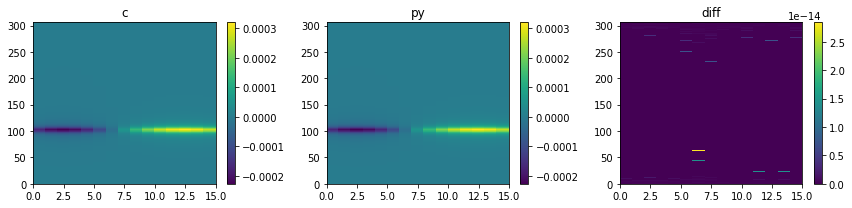

################################################## 

comparison = rho,
c_range = 8.450415e-01, py_range = 8.456782e-01, 
max diff = 5.047321e-04, rel. diff = 5.972869e-04,


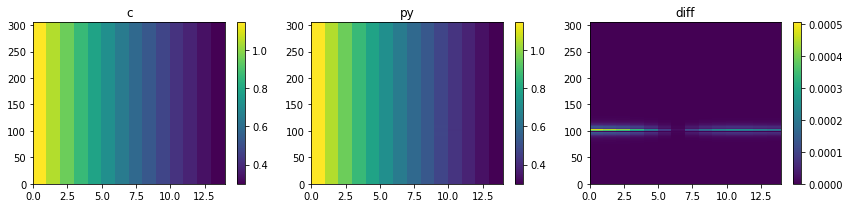

################################################## 

comparison = rhoY,
c_range = 7.903906e-01, py_range = 7.910441e-01, 
max diff = 4.968643e-04, rel. diff = 6.286314e-04,


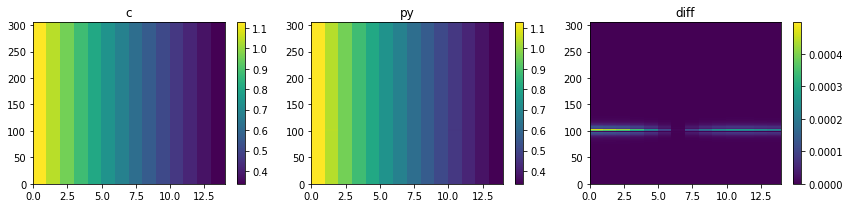

################################################## 

comparison = rhou,
c_range = 1.693148e-01, py_range = 1.693766e-01, 
max diff = 1.009256e-04, rel. diff = 5.960824e-04,


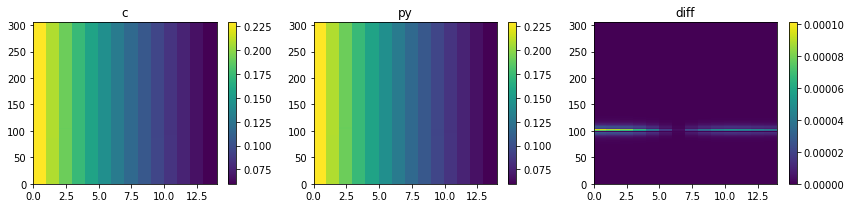

################################################## 

comparison = rhov,
c_range = 6.627594e-12, py_range = 6.627594e-12, 
max diff = 4.188137e-14, rel. diff = 6.319243e-03,


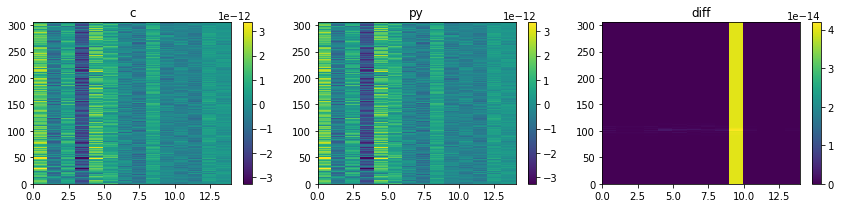

################################################## 

comparison = vortz,
c_range = 1.776824e-03, py_range = 1.776840e-03, 
max diff = 3.018067e-07, rel. diff = 1.698574e-04,


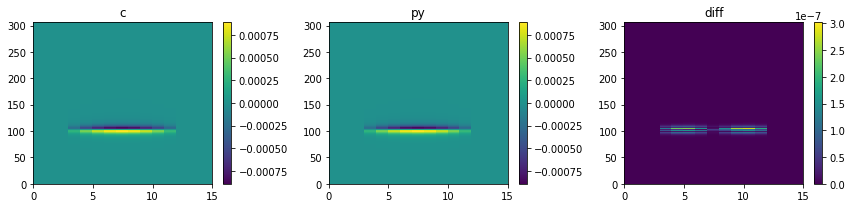

################################################## 

comparison = Y,
c_range = 1.395492e-01, py_range = 1.395492e-01, 
max diff = 1.907349e-05, rel. diff = 1.366793e-04,


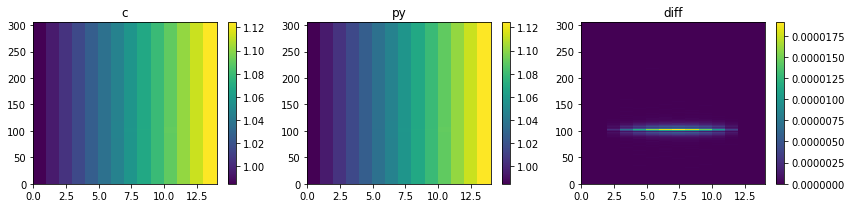

################################################## 



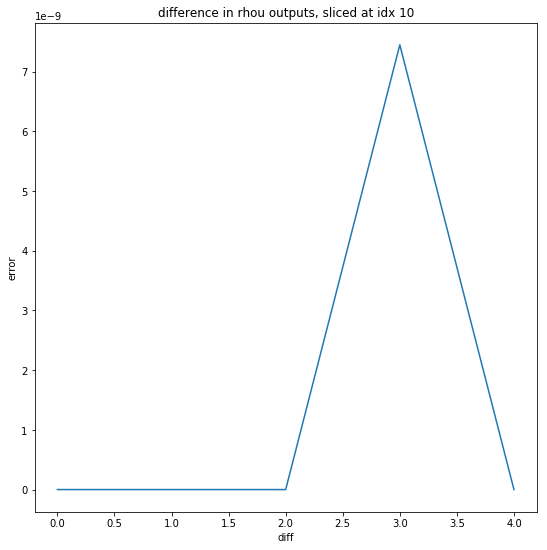

In [2419]:
# open the Python HDF file
pyfile = h5py.File(py_path, 'r')

# make comparisons for the arrays.
# Arguments: C-array (class attribute), Python-array (numpy array), and a title.
# PPP = np.copy(py_out('dp2_nodes'))
# PPP[:,-4:-2] = py_out('dp2_nodes')[:,2:4][::-1]

# diff(c.pnew, PPP, 'dp2_nodes')

inner = (slice(2,-2),slice(2,-2))
iwp = (slice(2,-2),slice(2,-2))
iwp_e = (slice(2,-2),slice(2,-2))
iwp_n = (slice(2,-3),slice(2,-3))
# iwp = (slice(None),slice(None))
if time == '004':
#     diff(c.hcenter, py_out('hcenter'), 'hcenter')
#     diff(c.wplusx[iwp], py_out('wplusx')[iwp_n], 'wplusx')
#     diff(c.wplusy[iwp], py_out('wplusy')[iwp_n], 'wplusy')
    diff(c.pnew[inner], py_out('p2_full')[inner], 'p2_full', option='na')
    diff(c.rhs_nodes, py_out('rhs_nodes'), 'rhs_nodes')
    diff(c.p2_initial, py_out('p2_initial'), 'p2_initial')
    
if time == '001' or time == '005':
    diff(c.flux_x, py_out('rhoYu').T, 'rhoYu')
    diff(c.flux_y, py_out('rhoYv').T, 'rhoYv')
    
# print(py_out('lap_test'))
# fig = plt.figure(figsize=(5,5))
# plt.pcolor(py_out('lap_test'))
# plt.colorbar()
# plt.show()

# diff(c.pnew,py_out('dp2_nodes'),'dp2_nodes')
# diff(c.rhs, py_out('rhs'), 'rhs')
diff(c.p2_nodes,py_out('p2_nodes'),'p2_nodes')
# diff(c.buoy,py_out('X'),'buoy')
# diff(c.dp2_c,py_out('dp2_cells'),'dp2_cells')
# diff(c.p2_c,py_out('p2_cells'),'p2_cells')

diff(c.rho,py_out('rho'),'rho')
# # diff(c.rhoe,py_out('rhoe'),'rhoe')
diff(c.rhoY,py_out('rhoY'),'rhoY')

diff(c.rhou,py_out('rhou'),'rhou')
# # print(np.argmax(np.abs(c.rhou - py_out('rhou'))))
diff(c.rhov,py_out('rhov'),'rhov')
# diff(c.rhow,py_out('rhow'),'rhow')

# diff(c.u, py_out('u'), 'u')
# diff(c.p, py_out('p'), 'p')
# diff(c.dpdim, py_out('dpdim'), 'dpdim')
diff(c.vortz, py_out('vortz'), 'vortz')

# diff(c.T, py_out('T'), 'T')
# diff(c.dT, py_out('dT'), 'dT')

diff(c.Y, py_out('Y'), 'Y')
# diff(c.dY, py_out('dY'), 'dY')

# print(c.hcenter[:][2:-2,2:-2])
# print(py_out('hcenter')[2:-2,2:-2])

# print(np.where(py_out('p2_initial')[inner] == 0.)[0])

# if time == '004':
#     idx = 0
#     fig = plt.figure(figsize=(9,9))
#     plt.plot(py_out('p2_full')[inner][:,idx], 'r')
#     plt.plot(c.pnew[inner][:,7])
#     plt.xlabel('p2_full')
#     plt.ylabel('error')
#     plt.show()

#     fig = plt.figure(figsize=(9,9))
#     plt.plot((py_out('p2_full') - c.pnew)[inner][:,idx])
#     plt.xlabel('diff')
#     plt.ylabel('error')
#     plt.show()
    
#     fig = plt.figure(figsize=(9,9))
#     plt.plot((py_out('p2_initial')[inner])[:,7])
#     plt.xlabel('p2_initial')
#     plt.ylabel('value')
#     plt.show()
    
#     print(py_out('p2_initial')[inner][2,:][:10])
    
if time == '002':
    idx = 1
    fig = plt.figure(figsize=(9,9))
    plt.plot(py_out('rhou')[:,idx],'r', label='python-output')
    plt.plot(c.rhou[:,idx],'k', label='c-output')
    plt.title('rhou, sliced at idx %i' %idx )
    plt.ylabel('rhou')
    plt.xlabel('x')
    plt.legend()
    plt.show()
    
    fig = plt.figure(figsize=(9,9))
    plt.plot((py_out('rhou') - c.rhou)[:,idx])
    plt.title('difference in rhou outputs, sliced at idx %i' %idx )
    plt.xlabel('diff')
    plt.ylabel('error')
    plt.show()
    
    
if time == '007':
    idx = 10
    fig = plt.figure(figsize=(9,9))
#     plt.plot((py_out('p2_nodes') - c.p2_nodes)[:,idx])
#     plt.plot(py_out('rhou')[:,idx][:2],'r', label='python-output')
#     plt.plot(c.rhou[:,idx][:2],'k', label='c-output')
    plt.plot((py_out('rhou') - c.rhou)[:,idx][:5])
    plt.title('difference in rhou outputs, sliced at idx %i' %idx )
    plt.xlabel('diff')
    plt.ylabel('error')
    plt.show()
    
if time == '005':
    idx = 3
    fig = plt.figure(figsize=(9,9))
    plt.plot((py_out('rhoYu').T - c.flux_x)[:,idx])
    plt.title('difference in rhoYu outputs, sliced at idx %i' %idx )
    plt.xlabel('diff')
    plt.ylabel('error')
    plt.show()
    
if time == '003':
    idx = 100
    fig = plt.figure(figsize=(9,9))
    plt.plot(py_out('rhov')[idx,:], '-ro',label='python')
    plt.plot(c.rhov[idx,:], '-bo',label='c')
    plt.title("rhov sliced at the 100th row (i.e. at x = 100)")
    plt.xlabel("y")
    plt.ylabel("rhov")
    plt.legend()
    plt.show()
    
if time == '009':
    idx = 7
    fig = plt.figure(figsize=(15,9))
    plt.plot(py_out('rhou')[:,idx],'r', label='python-output')
    plt.plot(c.rhou[:,idx],'k', label='c-output')
#     plt.plot((py_out('rhou') - c.rhou)[:,idx])
    plt.title('difference in rhou outputs, sliced at idx %i' %idx )
    plt.xlabel('diff')
    plt.ylabel('error')
    plt.legend()
    plt.show()
    
    idx = 12
    
    fig = plt.figure(figsize=(15,9))
    plt.plot(py_out('p2_nodes')[:,idx],'r', label='python-output')
    plt.plot(c.p2_nodes[:,idx],'k', label='c-output')
    plt.title('difference in p2_nodes outputs, sliced at idx %i' %idx )
    plt.xlabel('diff')
    plt.ylabel('error')
    plt.legend()
    plt.show()

pyfile.close()

In [2420]:
# directory = 'debug'
# filename = 'Lefts'
# time = '_003'
# string_hdf = time + '.hdf'
# string_h5 = time + '.h5'
# item = full_path + directory + '/' + filename + string_hdf


# subprocess.call(["./h4toh5convert", item])
# item_h5 = full_path + directory + '/' + filename + string_h5


# Lefts_rhou = h5py.File(item_h5, 'r')
# Lefts_rhou = Lefts_rhou['Data-Set-2'][:]

# label0 = '_003'
# def py_out0(py_dataset,time=label0):
#     return pyfile[str(py_dataset)][str(py_dataset)+time][:]

# pyfile = h5py.File(py_path, 'r')
# p_Lefts_rhou = py_out0('Lefts_rhou')
# pyfile.close()
# # 
# plt.figure(figsize = (10,8))
# plt.imshow(Lefts_rhou)
# plt.show()
# plt.imshow(p_Lefts_rhou)
# plt.show()
# plt.imshow(np.abs(Lefts_rhou - p_Lefts_rhou.T))

# pyfile.close()

In [2421]:
# directory = 'flux_x'
# filename = 'rhoY'
# time = '_000'
# string_hdf = time + '.hdf'
# string_h5 = time + '.h5'
# item = full_path + directory + '/' + filename + string_hdf


# subprocess.call(["./h4toh5convert", item])
# item_h5 = full_path + directory + '/' + filename + string_h5

# Sol_rhoY = h5py.File(item_h5, 'r')
# Sol_rhoY = Sol_rhoY['Data-Set-2'][:]

# directory = 'flux_x'
# filename = 'rhou'
# time = '_000'
# string_hdf = time + '.hdf'
# string_h5 = time + '.h5'
# item = full_path + directory + '/' + filename + string_hdf


# subprocess.call(["./h4toh5convert", item])
# item_h5 = full_path + directory + '/' + filename + string_h5

# Sol_rhou = h5py.File(item_h5, 'r')
# Sol_rhou = Sol_rhou['Data-Set-2'][:]

# directory = 'flux_x'
# filename = 'rho'
# time = '_000'
# string_hdf = time + '.hdf'
# string_h5 = time + '.h5'
# item = full_path + directory + '/' + filename + string_hdf


# subprocess.call(["./h4toh5convert", item])
# item_h5 = full_path + directory + '/' + filename + string_h5

# Sol_rho = h5py.File(item_h5, 'r')
# Sol_rho = Sol_rho['Data-Set-2'][:]


# directory = 'rhoY'
# filename = 'rhoY'
# time = '_000'
# string_hdf = time + '.hdf'
# string_h5 = time + '.h5'
# item = full_path + directory + '/' + filename + string_hdf

# subprocess.call(["./h4toh5convert", item])
# item_h5 = full_path + directory + '/' + filename + string_h5

# Sol_rhoYY = h5py.File(item_h5, 'r')
# Sol_rhoYY = Sol_rhoYY['Data-Set-2'][:]

# pyfile = h5py.File(py_path, 'r')
# p_rhoY = py_out('rhoY')
# pyfile.close()

# pyfile = h5py.File(py_path, 'r')
# p_rhou = py_out('rhou')
# pyfile.close()

# pyfile = h5py.File(py_path, 'r')
# p_rho = py_out('rho')
# pyfile.close()

# plt.imshow(Sol_rhoY[1:-1,1:-1])
# plt.show()
# plt.imshow(Sol_rhoYY[1:-1,1:-1])
# plt.show()
# plt.imshow(p_rhoY[1:-1,1:-1])
# plt.show()

# plt.imshow(Sol_rhou[1:-1,1:-1])
# plt.show()
# plt.imshow(p_rhou[1:-1,1:-1])
# plt.show()

# plt.imshow(Sol_rho[1:-1,1:-1])
# plt.show()
# plt.imshow(p_rho[1:-1,1:-1])
# plt.show()


# plt.imshow(Sol_rhoY - p_rhoY)
# plt.show()
# plt.imshow(Sol_rhou - p_rhou)
# plt.colorbar()
# plt.show()
# plt.imshow(Sol_rho - p_rho)
# plt.show()

In [2422]:
# directory = 'flux_x'
# filename = 'rhoYu'
# time = '_000'
# string_hdf = time + '.hdf'
# string_h5 = time + '.h5'
# item = full_path + directory + '/' + filename + string_hdf


# subprocess.call(["./h4toh5convert", item])
# item_h5 = full_path + directory + '/' + filename + string_h5

# array = h5py.File(item_h5, 'r')
# array = array['Data-Set-2'][:]

# plt.imshow(array)
# plt.colorbar()
# plt.show()
# print(array.shape)
# print(array.max(), array.min())
# print(np.argmax(array.flatten()))

# pyfile = h5py.File(py_path, 'r')

# p_array = py_out('rhoYu','_000')

# plt.imshow(p_array)
# plt.colorbar()
# plt.show()
# print(p_array.T.shape)
# print(p_array.max(), p_array.min())
# print(np.argmax(p_array))

# plt.imshow(np.abs(array - p_array.T))
# print("argmax diff = ", np.argmax(np.abs(array - p_array.T)))
# print("max diff = ", np.max(np.abs(array - p_array.T)))
# plt.colorbar()
# plt.show()


# # print(array[2])
# # print(p_array.T[2])

# print(array[-2])
# print(p_array.T[-2])

# directory = 'flux_y'
# filename = 'rhoYv'
# time = '_000'
# string_hdf = time + '.hdf'
# string_h5 = time + '.h5'
# item = full_path + directory + '/' + filename + string_hdf


# subprocess.call(["./h4toh5convert", item])
# item_h5 = full_path + directory + '/' + filename + string_h5

# array = h5py.File(item_h5, 'r')
# array = array['Data-Set-2'][:]

# plt.imshow(array)
# plt.colorbar()
# plt.show()
# print(array.max())

# p_array = py_out('rhoYv','_000')

# plt.imshow(p_array)
# plt.colorbar()
# plt.show()
# print(p_array.max())
# print(p_array.shape)

# plt.imshow(np.abs(array - p_array.T))
# plt.colorbar()
# plt.show()

# print("argmax diff = ", np.argmax(np.abs(array - p_array.T)))
# print("max diff = ", np.max(np.abs(array - p_array.T)))

# pyfile.close()

In [2423]:
pyfile.close()

In [2424]:
for i in range(2,3):
    print(i)
    
(-0.06056165571350958)**0.5

2


(1.506883668457318e-17+0.24609277866997556j)

In [2425]:
AA = np.zeros((5,5))
print(AA)
print(np.all(AA))

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
False


In [2426]:
rhoYu_cm =  0.9999511114038965
rhoYu_mm =  1.0003473979573558
rhoYu_cc =  0.9999842804036515
rhoYu_mc =  1.000166296189299
rhoYu_cp =  1.000010487506917
rhoYu_mp =  0.9999252581338697

rhoYu_m = 0.5*(rhoYu_cm+rhoYu_mm)
rhoYu_c = 0.5*(rhoYu_cc+rhoYu_mc)
rhoYu_p = 0.5*(rhoYu_cp+rhoYu_mp)

ans = 0.25*(rhoYu_m + 2.0*rhoYu_c + rhoYu_p)
print(ans)

print(1.000066911014053 - ans)

1.0000669260234925
-1.500943946908251e-08


In [2427]:
rhoYu_cm = 1.0001662778213436
rhoYu_mm = 1.0008170447231102
rhoYu_cc = 0.99992526849323593
rhoYu_mc = 0.99961879109867247
rhoYu_cp = 0.999712348255824
rhoYu_mp = 0.99851134117611362

rhoYu_m = 0.5*(rhoYu_cm+rhoYu_mm)
rhoYu_c = 0.5*(rhoYu_cc+rhoYu_mc)
rhoYu_p = 0.5*(rhoYu_cp+rhoYu_mp)

ans = 0.25*(rhoYu_m + 2.0*rhoYu_c + rhoYu_p)
print(ans)

0.9997868913950261
